In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("reddit_data.csv")
df = df.drop(columns=["Unnamed: 0"], axis=1)
df['time_created'] = df['created_utc'].apply(lambda x: str(datetime.utcfromtimestamp(x)).split()[1])
df.head()

,id,author,submission,body,subreddit,created_utc,collected_utc,time_created
0,t3_1834bpq,Championnats91,kao3hv7,Quality coffee and fancy chocolate. Can’t go w...,AskUK,1700895417,1700895417,06:56:57
1,t3_182y2il,ProfitTheProphet,kao3i5j,It was smoked a lot more widely than I think y...,AskAnAmerican,1700895423,1700895423,06:57:03
2,t3_182ychd,Stuspawton,kao3jjy,"I’m over two and a half years sober now, so I ...",AskUK,1700895451,1700895451,06:57:31
3,t3_18329v6,IngerasulBihorului,kao3kh2,2 DualSense Controllers(one of them didnt arri...,AskUK,1700895470,1700895470,06:57:50
4,t3_1834bpq,Kittlebeanfluff,kao3os8,Cocaine then.,AskUK,1700895557,1700895557,06:59:17


### Task 1.2

### Number of unique users in each subreddit 

In [3]:
def tumbling(x):
    twentymin = [20, 40, 60]
    for i in twentymin:
        if int(x) < i:
            return i / 10
    return 0

In [4]:
def hopping(x):
    fivemins = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
    for i in fivemins:
        if int(x) < i:
            return (i / 5)
    return 0

In [5]:
def get_unique_author(df, x, y):
    for i in x:
        eachtime = df.loc[df['20min_category'] == i]
        numberunique = len(eachtime['author'].unique())
        y.append(numberunique)

In [6]:
def get_five_cats(df, times, x):
    for i in times:
        results = df.loc[df["5min_category"] == i]
        x.append(results['author'].count())
        

In [7]:
def get_twenty_cat(twenty, five):
    for i in range(len(five)):
        if i+4 == len(five):
            break
        twenty.append(sum(five[i:i+4]))

In [8]:
mins = df['time_created'].apply(lambda x: x.split(":")[1])
hours = df['time_created'].apply(lambda x: x.split(":")[0])

df['20min_category'] = hours.apply(lambda x: float(x)) + mins.apply(tumbling) / 10
df['5min_category'] = hours.apply(lambda x: float(x)) + mins.apply(hopping) / 100

In [9]:
# hopping window

dfUS = df[df['subreddit'] == "AskAnAmerican"]
dfUK = df[df['subreddit'] == "AskUK"]

xUS = dfUS['20min_category'].unique()
xUK = dfUK['20min_category'].unique()

yUS = []
yUK = []

get_unique_author(dfUK, xUK, yUK)
get_unique_author(dfUS, xUS, yUS)

In [10]:
# sliding window

mintimesUK = dfUK['5min_category'].unique()
mintimesUS = dfUS['5min_category'].unique()

UKfive = []
USfive = []

UKtwentys = []
UStwentys = []

get_five_cats(dfUK, mintimesUK, UKfive)
get_five_cats(dfUS, mintimesUS, USfive)

get_twenty_cat(UKtwentys, UKfive)
get_twenty_cat(UStwentys, USfive)

unique UK users per 20 minutes tumbling window


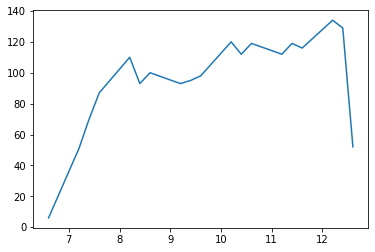

unique US users per 20 minutes tumbling window


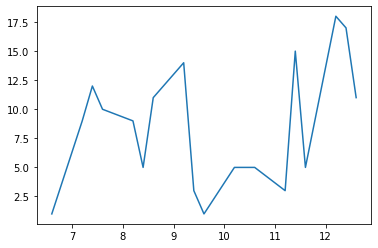

In [11]:
print("unique UK users per 20 minutes tumbling window")
plt.plot(xUK, yUK)
plt.show()

print("unique US users per 20 minutes tumbling window")
plt.plot(xUS, yUS)
plt.show()

unique US users per 20 minutes with hopping 20 min with 5 min over lap window


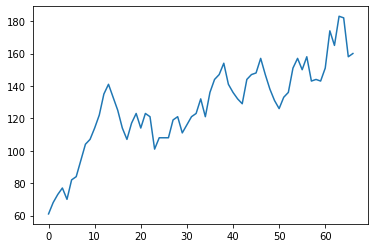

unique US users per 20 minutes with hopping 20 min with 5 min over lap window


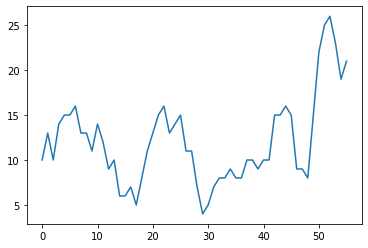

In [12]:
print("unique US users per 20 minutes with hopping 20 min with 5 min over lap window")
plt.plot(UKtwentys)
plt.show()

print("unique US users per 20 minutes with hopping 20 min with 5 min over lap window")
plt.plot(UStwentys)
plt.show()

# -----------change the axis to make sense-------------

Q: Comment upon the differences you observed in the data comparing the two subreddits.

A: The sliding window displays a more current update of active unique users in each subreddit; a more continuous representation of the comments being posted. The data was collected at 7am-12pm UK time therefore displays an increase of activity in the morning in the AskUK subreddit compared to low activity in AskAnAmerican subreddit which  would be asleep for the majority of the time data collected.

### Average number of words per comment for each subreddit

In [13]:
def count_word(x):
    return len(x.split())

In [14]:
def get_avg_word(df, x):
    all_mean = []

    for i in x:
        eachbody = df.loc[df['20min_category'] == i]
        mean = sum(eachbody['numWord']) / len(eachbody['numWord'])
        all_mean.append(int(mean))
    
    return all_mean

In [15]:
def get_avg_word_five(df, x):
    all_mean = []

    for i in x:
        eachbody = df.loc[df['5min_category'] == i]
        mean = sum(eachbody['numWord']) / len(eachbody['numWord'])
        all_mean.append(int(mean))
    
    return all_mean

In [16]:
def get_avg_word_twenty(five):
    res = []
    for i in range(len(five)):
        if i+4 == len(five):
            break
        res.append(sum(five[i:i+4])/4)
    return res

In [17]:
# hopping window

dfUK['numWord'] = dfUK['body'].apply(lambda x: count_word(x))
dfUS['numWord'] = dfUS['body'].apply(lambda x: count_word(x))

yUK2 = get_avg_word(dfUK, xUK)
yUS2 = get_avg_word(dfUS, xUS)

<ipython-input-17-3d867c9bb7c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUK['numWord'] = dfUK['body'].apply(lambda x: count_word(x))
<ipython-input-17-3d867c9bb7c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUS['numWord'] = dfUS['body'].apply(lambda x: count_word(x))


In [18]:
# sliding window

UK2five = get_avg_word_five(dfUK, mintimesUK)
US2five = get_avg_word_five(dfUS, mintimesUS)

UK2twentys = get_avg_word_twenty(UK2five)
US2twentys = get_avg_word_twenty(US2five)


Average number of words per comment for UK - tumbling window of 20 minutes


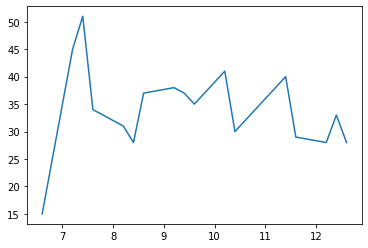

Average number of words per comment for US - tumbling window of 20 minutes


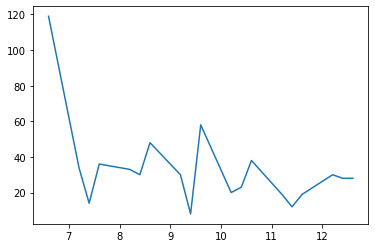

In [19]:
print("Average number of words per comment for UK - tumbling window of 20 minutes")
plt.plot(xUK, yUK2)
plt.show()
print("Average number of words per comment for US - tumbling window of 20 minutes")

plt.plot(xUS, yUS2)
plt.show()

Average number of words per comment for UK - hopping window of 20 minutes with 5 min hop


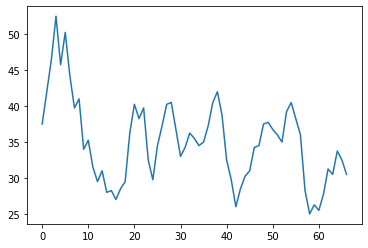

Average number of words per comment for US - hopping window of 20 minutes with 5 min hop


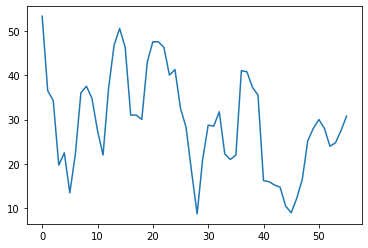

In [20]:
print("Average number of words per comment for UK - hopping window of 20 minutes with 5 min hop")
plt.plot(UK2twentys)
plt.show()
print("Average number of words per comment for US - hopping window of 20 minutes with 5 min hop")

plt.plot(US2twentys)
plt.show()

Q: Comment upon the differences you observed in the data comparing the two subreddits.

A: The sliding window displays a more current update of comment length in each subreddit; a more continuous representation of the comments being posted. Extreme values of the tumbling window are regulated in the hopping window, providing an averaged view of the commenting at the time. The hopping window provides a more granular view of the comment length